In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体

# 了解数据集

In [2]:
heart_df = pd.read_csv("./data/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* age - 年龄
* sex - (1 = male(男性); 0 = (女性))
* cp - chest pain type(胸部疼痛类型)（1：典型的心绞痛-typical，2：非典型心绞痛-atypical，3：没有心绞痛-non-anginal，4：无症状-asymptomatic）
* trestbps - 静息血压 (in mm Hg on admission to the hospital)
* chol - 胆固醇 in mg/dl
* fbs - (空腹血糖 > 120 mg/dl) (1 = true; 0 = false)
* restecg - 静息心电图测量（0：普通，1：ST-T波异常，2：可能左心室肥大）
* thalach - 最高心跳率
* exang - 运动诱发心绞痛 (1 = yes; 0 = no)
* oldpeak - 运动相对于休息引起的ST抑制
* slope - 运动ST段的峰值斜率（1：上坡-upsloping，2：平的-flat，3：下坡-downsloping）
* ca - 主要血管数目(0-4)
* thal - 一种叫做地中海贫血的血液疾病（3 = normal; 6 = 固定的缺陷-fixed defect; 7 = 可逆的缺陷-reversable defect）
* target - 是否患病 (1=yes, 0=no)

In [3]:
heart_df.info()
# 没有一个特征是空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# 患病的分布情况

In [4]:
# value_counts()可以分组求值
# .代替[] 也是可以的 属性找不到会找值
heart_df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

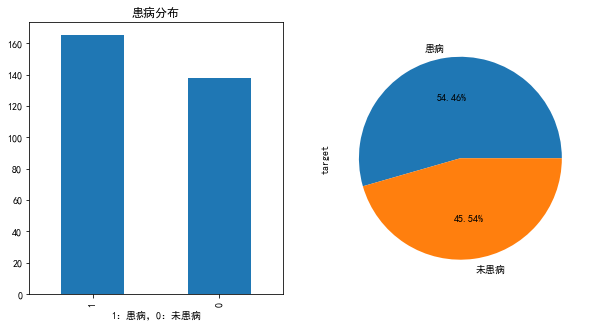

In [5]:
# series 与DataFrame 对象可以直接调用plot
fig,axes = plt.subplots(1,2,figsize=(10,5))
ax = heart_df.target.value_counts().plot(kind="bar",ax=axes[0])
ax.set_title("患病分布")
ax.set_xlabel("1：患病，0：未患病")

heart_df.target.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['患病','未患病'],ax=axes[1])

# 性别和患病的分布


Text(0.5, 0, '0：女性，1：男性')

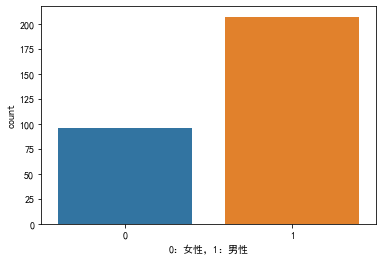

In [6]:
# 使用barplot 还需要自己计算人数 countplot会自动计算
ax = sns.countplot(x="sex",data=heart_df)
ax.set_xlabel("0：女性，1：男性")

Text(0.5, 0, '0：女性，1：男性')

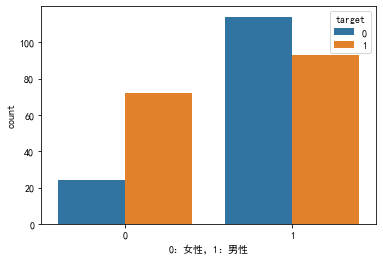

In [7]:
# 我们要查看女性，男性当中有多少个患病的 hue
ax = sns.countplot(x="sex",data=heart_df,hue='target')
ax.set_xlabel("0：女性，1：男性")

## 绘制多图布局

Text(0.5, 1.0, '患病性别比例')

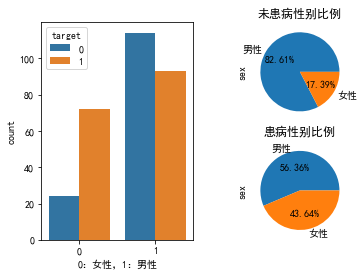

In [8]:
ax1 = plt.subplot(121) #一行两列的第一个位置
ax = sns.countplot(x="sex",hue='target',data=heart_df,ax=ax1)
ax.set_xlabel("0：女性，1：男性")

ax2 = plt.subplot(222) # 两行两列第二个位置
heart_df[heart_df['target'] == 0].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['男性','女性'],ax=ax2)
ax2.set_title("未患病性别比例")

ax2 = plt.subplot(224) # 两行两列第四个位置
heart_df[heart_df['target'] == 1].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['男性','女性'],ax=ax2)
ax2.set_title("患病性别比例")

# 年龄与患病分析

In [9]:
heart_df.age.min(),heart_df.age.max()

(29, 77)

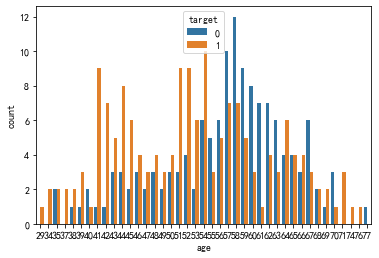

In [10]:
sns.countplot(x="age",hue="target",data=heart_df)

In [11]:
pd.cut(heart_df.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['青年人','中年人','老年人'])

0      老年人
1      青年人
2      青年人
3      中年人
4      中年人
      ... 
298    中年人
299    中年人
300    老年人
301    中年人
302    中年人
Name: age, Length: 303, dtype: category
Categories (3, object): [青年人 < 中年人 < 老年人]

In [12]:
age_type = pd.cut(heart_df.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['青年人','中年人','老年人'])
pd.concat([age_type,heart_df.target],axis=1)

,age,target
0,老年人,1
1,青年人,1
2,青年人,1
3,中年人,1
4,中年人,1
...,...,...
298,中年人,0
299,中年人,0
300,老年人,0
301,中年人,0


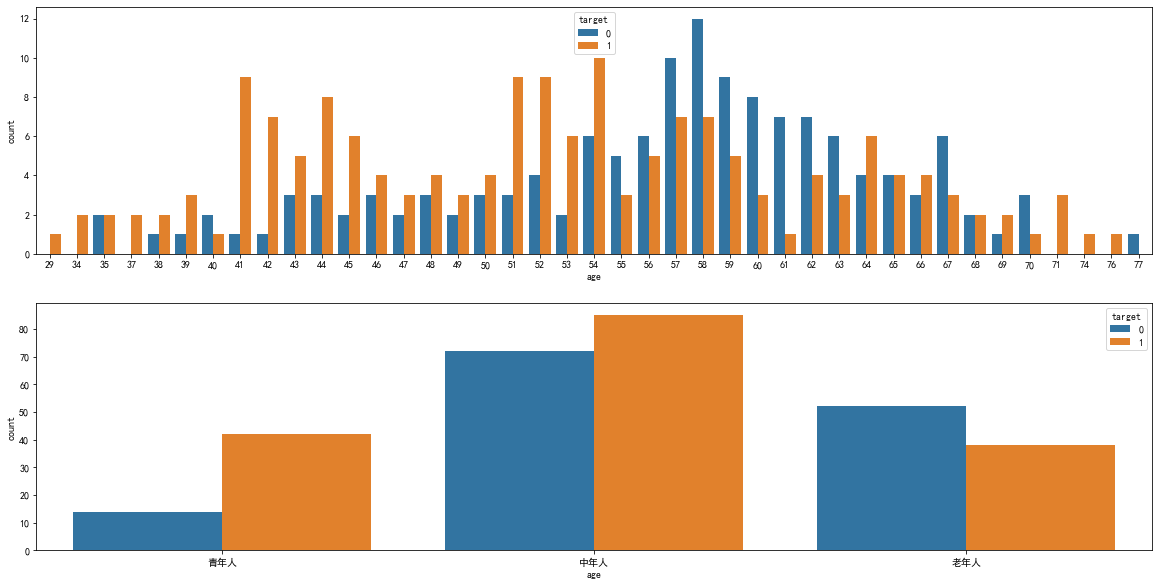

In [13]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.countplot(x="age",hue="target",data=heart_df,ax=axes[0])

# 0-45：青年人，45-59：中年人，60-100：老年人
age_type = pd.cut(heart_df.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['青年人','中年人','老年人'])
age_target_df = pd.concat([age_type,heart_df.target],axis=1)
sns.countplot(x="age",hue='target',data=age_target_df)

# 统一看下所有特征的分布情况


In [14]:
#fig, axes = plt.subplots(7, 2, figsize=(10, 20))
#for x in range(0, 14):
 #   plt.subplot(7, 2, x+1)  # 7行两列第几个图
 #   sns.distplot(heart_df.iloc[:,x], kde=True)  # kde把曲线也绘制出来

#plt.tight_layout()  # 适当调整位置

# 每个特征之间是否有关联性


In [15]:
# 如果有计算出来
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


C:\Users\auniceo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\auniceo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


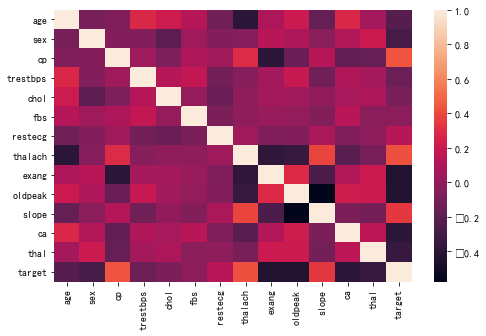

In [16]:
# 绘制热力图看看
plt.figure(figsize=(8,5))
sns.heatmap(heart_df.corr())

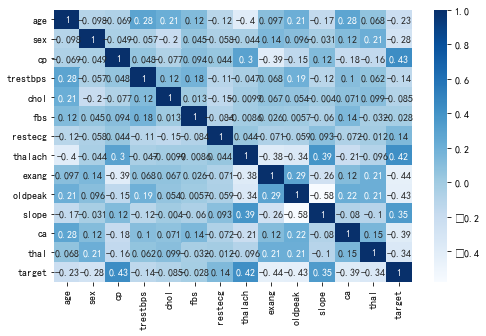

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(heart_df.corr(),cmap="Blues",annot=True)

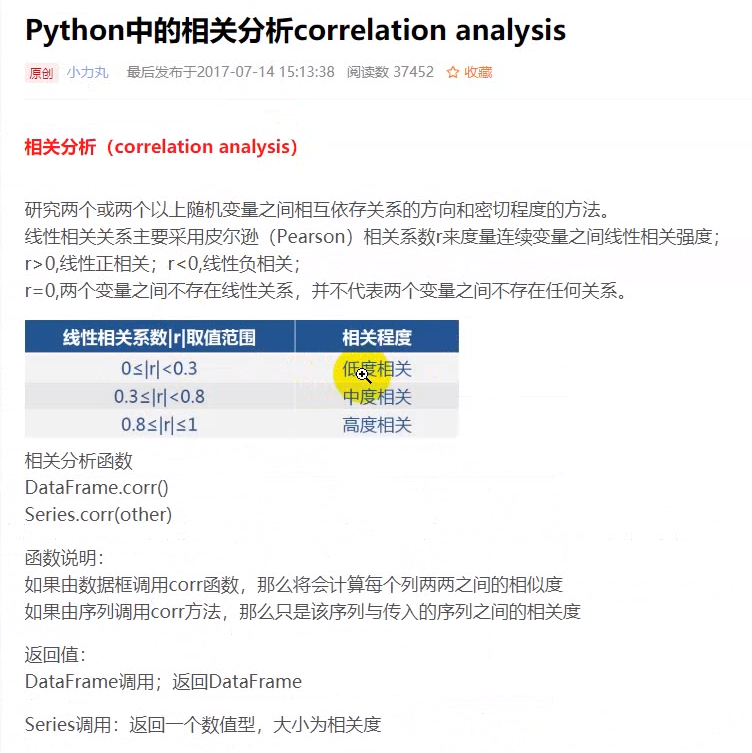

低度相关，我们一般当做是独立的。完全不相关在生活中一般不可能。

# 建模操作
## 数据预处理

In [18]:
features = heart_df.drop(columns=['target'])
targets = heart_df['target']

In [19]:
# 将离散型数据，从普通的0,1,2这些，转换成真正的字符串表示

# sex 0代表女性 1代表男性
# 把sex这一行所有=0的数都取出来，然后把sex重新复制female
features.loc[features['sex']==0,'sex'] = 'female'
features.loc[features['sex']==1,'sex'] = 'male'

# cp
features.loc[features['cp'] == 1,'cp'] = 'typical'
features.loc[features['cp'] == 2,'cp'] = 'atypical'
features.loc[features['cp'] == 3,'cp'] = 'non-anginal'
features.loc[features['cp'] == 4,'cp'] = 'asymptomatic'

# fbs
features.loc[features['fbs'] == 1,'fbs'] = 'true'
features.loc[features['fbs'] == 0,'fbs'] = 'false'

# exang
features.loc[features['exang'] == 1,'exang'] = 'true'
features.loc[features['exang'] == 0,'exang'] = 'false'

# slope
features.loc[features['slope'] == 1,'slope'] = 'true'
features.loc[features['slope'] == 2,'slope'] = 'true'
features.loc[features['slope'] == 3,'slope'] = 'true'

# thal
features.loc[features['thal'] == 3,'thal'] = 'normal'
features.loc[features['thal'] == 3,'thal'] = 'fixed'
features.loc[features['thal'] == 3,'thal'] = 'reversable'

# restecg
# 0：普通，1：ST-T波异常，2：可能左心室肥大
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left ventricular hypertrophy'

# ca
features['ca'].astype("object") #0-4不好表示 所以不变

# thal
features.thal.astype("object") #与原数据不准 所以保留下来  只是转换为字符串

features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,non-anginal,145,233,true,normal,150,false,2.3,0,0,1
1,37,male,atypical,130,250,false,ST-T abnormal,187,false,3.5,0,0,2
2,41,female,typical,130,204,false,normal,172,false,1.4,true,0,2
3,56,male,typical,120,236,false,ST-T abnormal,178,false,0.8,true,0,2
4,57,female,0,120,354,false,ST-T abnormal,163,true,0.6,true,0,2


针对离散型数据 one-hot编码 连续型数据 标准化

这里我们一次到位

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = pd.get_dummies(features) #经过了onehot编码后重新赋值，已经有标准化前所有的列名称
features_temp = StandardScaler().fit_transform(features)#做完后再标准化 这样就能够解决能够切割的问题还有名称的问题

# features_temp = StandardScaler().fit_transform(pd.get_dummies(features))
X_train,X_test,y_train,y_test = train_test_split(features_temp,targets,test_size=0.25)

接下来分类

1. K近邻
2. 决策树
3. 随机森林
4. 逻辑回归
5. SGD分类

朴素贝叶斯比较适合做文本分类 不适合做预测

In [21]:
# 一次性导入所有用到的库
from sklearn.neighbors import KNeighborsClassifier
# 交叉验证得分 第一种情况一堆数 分成三等份 先使用前面两等份训练  第三份数据用来测试
#第二种情况 二三训练，一测试
# 第三种情况 一三训练，二测试
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score

## k近邻

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
# 第一个算法对象，第二个X值也就是特征值 第三个Y目标值
scores = cross_val_score(knn,features_temp,targets,cv=5)
scores 
# 默认分成三等分，可以指定为五等份，每一等份的平均得分

array([0.81967213, 0.86885246, 0.78688525, 0.85      , 0.83333333])

In [23]:
# 求平均值
print("准确率：",scores.mean())

准确率： 0.8317486338797814


In [24]:
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
# 精准率
print("精准率：",precision_score(y_test,y_predict))
# 召回率
print("召回率：",recall_score(y_test,y_predict))
# F1-Score
print("F1得分：",f1_score(y_test,y_predict))


精准率： 0.8723404255319149
召回率： 0.8913043478260869
F1得分： 0.8817204301075269


## 模型评估图

### 模型评判——# https://www.jianshu.com/p/c61ae11cc5f6

精准率，召回率图
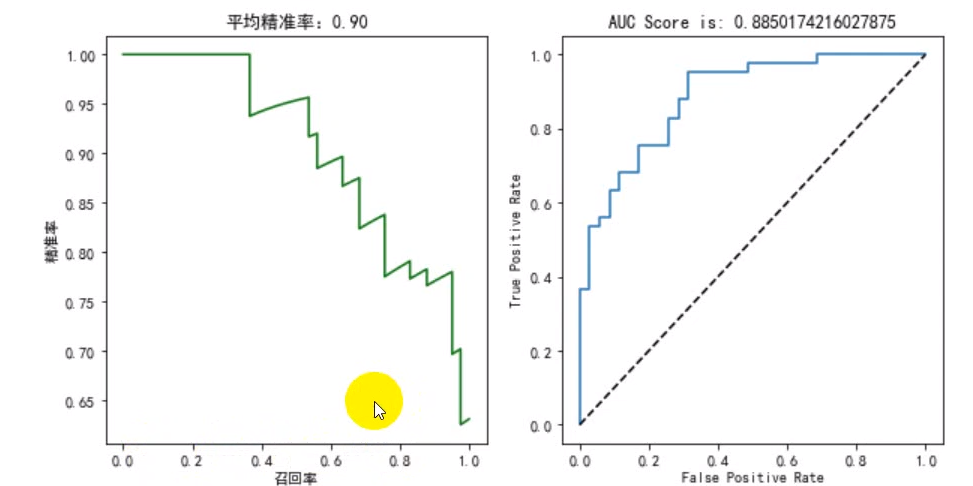

根据这一组数据去判断这个人有没有的心脏病，超过0.5得了心脏病，低于0.5没有得心脏病  这个预值可以调整 

你可以调整到最合适的预值

这个图越靠近右上角说明 这条曲线向下的面积越大 模型越好  x代表召回率 y代表精准率 不可能达到(1,1) 召回精准都是最高 模型最好

之前通过数据的值 现在通过图形来看这个模型的好坏

右边的叫做ROC曲线

以FP预测一个结果是正例但实际上是假例，预测的结果是错误的。我们的TP代表你预测的是正例，但实际上是正例 预测的结果是正确的

看右下角，右下角越大，越好，(0,1)说明都预测正确了，没有一个预测错误的。

AUC得分就是面积

### 如何绘制精准率、召回率图

In [25]:
# precision_recall_curve  计算精准率召回率曲线   返回精准率 召回率 预值  返回三组数据
#roc_curve   计算ROC曲线  返回三组数据  FPR TPR 预值
#average_precision_score   计算平均精准率
#auc #auc面积
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc

In [26]:
# y_true, 目标值真实值
# probas_pred, 预测的可能性,不能直接传递预测到的结果，要传递预测到的概率，这样才能进行计算  这里要使用predict_proba函数  predict_表示预测
# proba表示可能性，使用它就能够预测
# pos_label=None, 
# sample_weight=None,
knn.predict_proba(X_test)
# 第一列0(没有得心脏病)的概率 1的概率

array([[0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. ,

In [27]:
y_predict_proba=knn.predict_proba(X_test)
#接下来我们不断的调整预值就可以了
# 不需要传递两列，传递它的某一列就行了
precision_recall_curve(y_test,y_predict_proba[:,1])
# 返回三个元组 元组第0项精准率
# 第二个元组 召回率
# 第三个 预值

(array([0.60526316, 0.6984127 , 0.76785714, 0.87234043, 0.89189189,
        0.91304348, 1.        ]),
 array([1.        , 0.95652174, 0.93478261, 0.89130435, 0.7173913 ,
        0.45652174, 0.        ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]))

Text(0, 0.5, 'TPR')

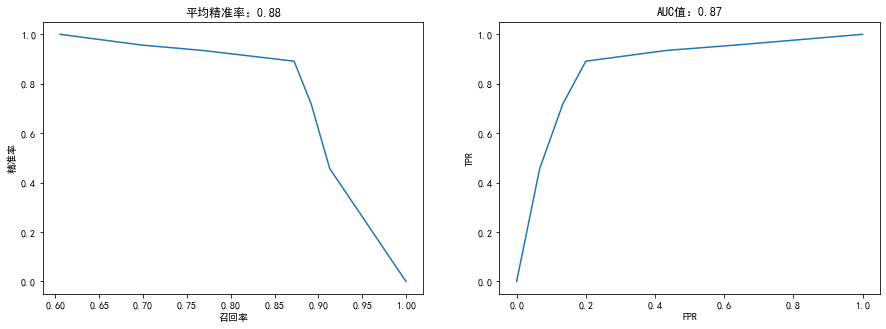

In [28]:
precision,recalls,thretholds=precision_recall_curve(y_test,y_predict_proba[:,1])
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].plot(precision,recalls)
# 绘制平均精准率
# average_precision_score 传递真实值，比例值
axes[0].set_title("平均精准率：%.2f"%average_precision_score(y_test,y_predict_proba[:,1]))
axes[0].set_xlabel("召回率")
axes[0].set_ylabel("精准率")

# 绘制ROC曲线
fpr,tpr,thretholds =roc_curve(y_test,y_predict_proba[:,1])
axes[1].plot(fpr,tpr)
axes[1].set_title("AUC值：%.2f"%auc(fpr,tpr))
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TPR")

In [29]:
# 上面可以进行封装 封装成一个函数 后面直接用
def plotting(estimator,y_test):
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    y_predict_proba = estimator.predict_proba(X_test)
    precisions,recalls,thretholds = precision_recall_curve(y_test,y_predict_proba[:,1])
    axes[0].plot(precisions,recalls)
    axes[0].set_title("平均精准率：%.2f"%average_precision_score(y_test,y_predict_proba[:,1]))
    axes[0].set_xlabel("召回率")
    axes[0].set_ylabel("精准率")

    fpr,tpr,thretholds = roc_curve(y_test,y_predict_proba[:,1])
    axes[1].plot(fpr,tpr)
    axes[1].set_title("AUC值：%.2f"%auc(fpr,tpr))
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")


## k近邻完整的代码

准确率： 0.8317486338797814
精准率： 0.8723404255319149
召回率： 0.8913043478260869
F1得分： 0.8817204301075269


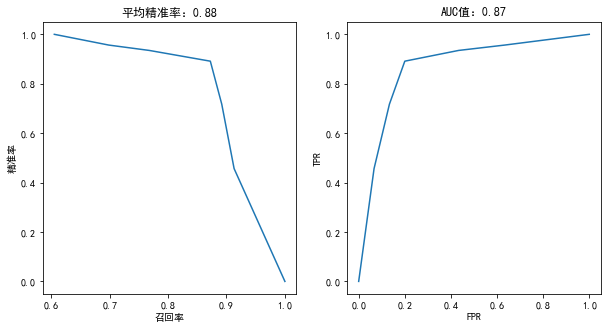

In [30]:
# 1. K近邻
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,features_temp,targets,cv=5)
print("准确率：",scores.mean())

knn.fit(X_train,y_train)
# 查看逻辑回归那一章节
y_predict = knn.predict(X_test)
# 精准率
print("精准率：",precision_score(y_test,y_predict))
# 召回率
print("召回率：",recall_score(y_test,y_predict))
# F1-Score
print("F1得分：",f1_score(y_test,y_predict))

plotting(knn,y_test)

## 决策树

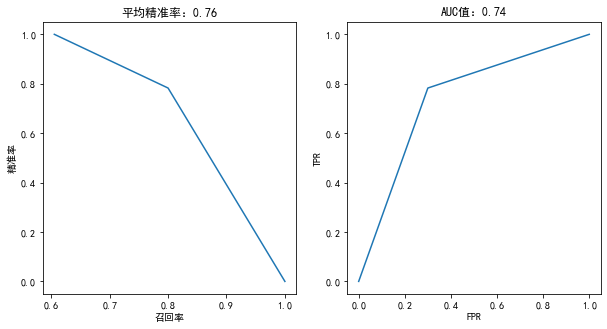

In [31]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10) #修改树的深度，如果还是这样差，变化不大，那就说明这个模型不管用了
tree.fit(X_train,y_train)

plotting(tree,y_test)

## 随机森林

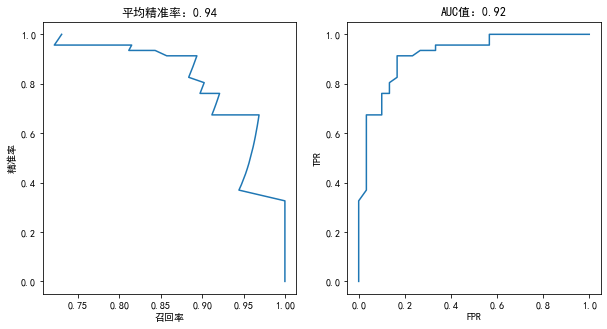

In [32]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) #指定多少棵树
rf.fit(X_train,y_train)
plotting(rf,y_test)

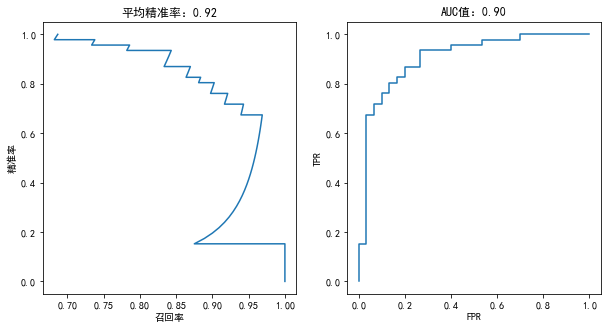

In [33]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(tol=1e-10) #如果误差小于e的-10次方就会停止
logic.fit(X_train,y_train)
plotting(logic,y_test)

## SGD分类

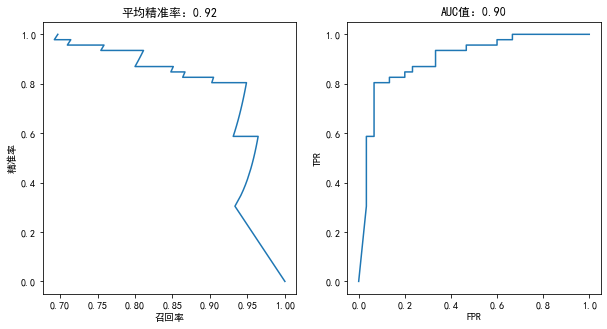

In [35]:
# SGD分类
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
sgd.fit(X_train,y_train)
plotting(sgd,y_test)

In [36]:
help(SGDClassifier) #|  loss : str, default='hinge'  hinge损失函数 待会需要使用SGDClassifier 求概率值，所以我们这里需要更改损失函数为log
# log给逻辑回归一个可能的分类 针对每个分类的概率值

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, a.o.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning, see the partial_fit method.
 |  For best results using the default learning rate schedule, the data should


# 特征重要性分析

In [37]:
# 决策树来打印 特征重要性 并不知道 数值代表的是什么特征
tree.feature_importances_

array([0.14217372, 0.02649393, 0.08256911, 0.06558796, 0.03266021,
       0.09863651, 0.03794993, 0.05114625, 0.28379829, 0.        ,
       0.0157702 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02018585, 0.        , 0.        , 0.        ,
       0.        , 0.01298203, 0.        , 0.05005225, 0.07999375])

In [38]:
# 之前的features 是这样写的features_temp = StandardScaler().fit_transform(pd.get_dummies(features))
# 这样会有一个问题，因为现在的features 已经经过标准化，没有保留名称了
# features 现在还是DataFrame对象 但是one-hot编码之后 特征会增加
# 现在可以拆分成这两个
# features = pd.get_dummies(features)
# features_temp = StandardScaler().fit_transform(features)
tree.feature_importances_,features.columns

(array([0.14217372, 0.02649393, 0.08256911, 0.06558796, 0.03266021,
        0.09863651, 0.03794993, 0.05114625, 0.28379829, 0.        ,
        0.0157702 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02018585, 0.        , 0.        , 0.        ,
        0.        , 0.01298203, 0.        , 0.05005225, 0.07999375]),
 Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_female',
        'sex_male', 'cp_0', 'cp_atypical', 'cp_non-anginal', 'cp_typical',
        'fbs_false', 'fbs_true', 'restecg_Left ventricular hypertrophy',
        'restecg_ST-T abnormal', 'restecg_normal', 'exang_false', 'exang_true',
        'slope_0', 'slope_true', 'thal_0', 'thal_1', 'thal_2', 'thal_normal'],
       dtype='object'))

In [39]:
pd.Series(data=rf.feature_importances_,index=features.columns).sort_values(ascending=False)

oldpeak                                 0.108571
thalach                                 0.098934
ca                                      0.097338
age                                     0.088264
cp_0                                    0.088011
thal_2                                  0.081332
thal_normal                             0.071751
chol                                    0.065579
trestbps                                0.054567
cp_atypical                             0.043195
exang_true                              0.041307
exang_false                             0.027800
sex_male                                0.023843
cp_non-anginal                          0.017513
sex_female                              0.017265
restecg_normal                          0.016444
restecg_ST-T abnormal                   0.013864
thal_1                                  0.011275
fbs_true                                0.009192
cp_typical                              0.007970
fbs_false           

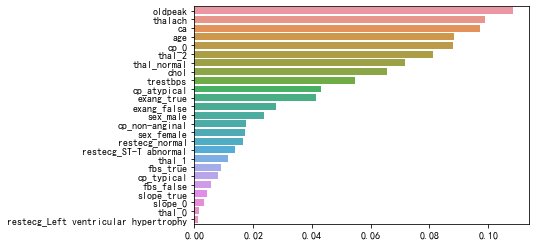

In [40]:
importances = pd.Series(data=rf.feature_importances_,index=features.columns).sort_values(ascending=False)
sns.barplot(y=importances.index,x=importances.values,orient='h')